In [20]:
#hide
import ipywidgets as widgets
from ipywidgets import FloatSlider
from fastai2.vision.all import *
from fastai2.vision.widgets import *
from IPython.display import display,clear_output, Javascript
import webbrowser

style = {'description_width': 'initial'}

RED = '\033[31m'
BLUE = '\033[94m'
GREEN = '\033[92m'
BOLD   = '\033[1m'
ITALIC = '\033[3m'
RESET  = '\033[0m'

In [39]:
def exp():
    button = widgets.Button(description='Press')
    display(button)
    def on_b(b):
        print('loading source')
        source = untar_data(URLs.DOGS)
        items = get_image_files(source)
        print('done')
        print('build datablock')
        tfms = [[PILImage.create], [parent_label, Categorize]]
        item_tfms = [ToTensor(), Resize(128)]
        print('done')
        print('build dsets')
        dsets = Datasets(items, tfms=tfms)
        dls = dsets.dataloaders(after_item=item_tfms, after_batch=None, bs=32, num_workers=0)
        print('building batch')
        dls.show_batch(max_n=12, nrows=2, ncols=6)
    button.on_click(on_b)

Button(description='Press', style=ButtonStyle())

loading source
done
build datablock
done
build dsets
building batch


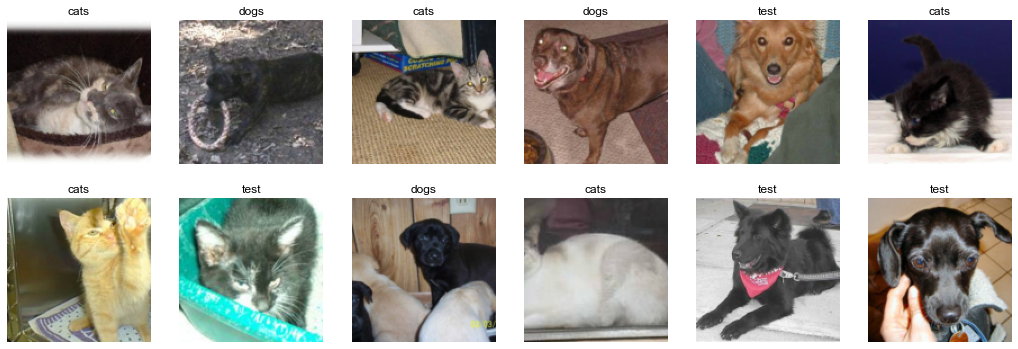

In [40]:
exp()

In [2]:
def dashboard_two():
    """GUI for second accordion window"""
    dashboard_two.datas = widgets.ToggleButtons(
        options=['PETS', 'CIFAR', 'IMAGENETTE_160', 'IMAGEWOOF_160', 'MNIST_TINY'],
        description='Choose',
        value=None,
        disabled=False,
        button_style='info',
        tooltips=[''],
        style=style
    )

    display(dashboard_two.datas)

    button = widgets.Button(description='Explore', button_style='success')
    display(button)
    out = widgets.Output()
    display(out)
    def on_button_explore(b):
        with out:
            clear_output()
            ds_choice()

    button.on_click(on_button_explore)

In [3]:
#Helpers for dashboard two
def ds_choice():
    """Helper for dataset choices"""
    if dashboard_two.datas.value == 'PETS':
        ds_choice.source = untar_data(URLs.DOGS)
    elif dashboard_two.datas.value == 'CIFAR':
        ds_choice.source = untar_data(URLs.CIFAR)
    elif dashboard_two.datas.value == 'IMAGENETTE_160':
        ds_choice.source = untar_data(URLs.IMAGENETTE_160)
    elif dashboard_two.datas.value == 'IMAGEWOOF_160':
        ds_choice.source = untar_data(URLs.IMAGEWOOF_160)
    elif dashboard_two.datas.value == 'MNIST_TINY':
        ds_choice.source = untar_data(URLs.MNIST_TINY)

    print(BOLD + BLUE + "Dataset: " + RESET + BOLD + RED + str(dashboard_two.datas.value))
    plt_classes()

In [4]:
def plt_classes():
    """Helper for plotting classes in folder"""
    disp_img_but = widgets.Button(description='View Images?', button_style='success')
    Path.BASE_PATH = ds_choice.source
    train_source = (ds_choice.source/'train/').ls().items
    print(BOLD + BLUE + "Folders: " + RESET + BOLD + RED + str(train_source))
    print(BOLD + BLUE + "\n" + "No of classes: " + RESET + BOLD + RED + str(len(train_source)))

    num_l = []
    class_l = []
    for j, name in enumerate(train_source):
        fol = (ds_choice.source/name).ls().sorted()
        names = str(name)
        class_split = names.split('train')
        class_l.append(class_split[1])
        num_l.append(len(fol))

    y_pos = np.arange(len(train_source))
    performance = num_l

    plt.style.use('seaborn')
    plt.bar(y_pos, performance, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xticks(y_pos, class_l, rotation=90)
    plt.ylabel('Images')
    plt.title('Images per Class')
    plt.show()

    display(disp_img_but)
    img_out = widgets.Output()
    display(img_out)
    def on_disp_button(b):
        with img_out:
            clear_output()
            display_images()
    disp_img_but.on_click(on_disp_button)

def display_images():
    """Helper for displaying images from folder"""
    train_source = (ds_choice.source/'train/').ls().items
    for i, name in enumerate(train_source):
        fol = (ds_choice.source/name).ls().sorted()
        fol_disp = fol[0:5]
        filename = fol_disp.items
        fol_tensor = [tensor(Image.open(o)) for o in fol_disp]
        print(BOLD + BLUE + "Loc: " + RESET + str(name) + " " + BOLD + BLUE + "Number of Images: " + RESET +
              BOLD + RED + str(len(fol)))

        fig = plt.figure(figsize=(15,15))
        columns = 5
        rows = 1
        ax = []

        for i in range(columns*rows):
            for i, j in enumerate(fol_tensor):
                img = fol_tensor[i]    # create subplot and append to ax
                ax.append( fig.add_subplot(rows, columns, i+1))
                ax[-1].set_title("ax:"+str(filename[i]))  # set title
                plt.tick_params(bottom="on", left="on")
                plt.imshow(img)
                plt.xticks([])
        plt.show()


In [5]:
def dashboard_one():
    """GUI for first accordion window"""
    import torchvision
    try:
        import fastai2; fastver = fastai2.__version__
    except ImportError:
        fastver = 'fastai not found'
    try:
        import fastprogress; fastprog = fastprogress.__version__
    except ImportError:
        fastprog = 'fastprogress not found'
    try:
        import fastpages; fastp = fastpages.__version__
    except ImportError:
        fastp = 'fastpages not found'
    try:
        import nbdev; nbd = nbdev.__version__
    except ImportError:
        nbd = 'nbdev not found'

    print (BOLD +  RED + '>> fastGUI')

    button = widgets.Button(description='System', button_style='success')
    ex_button = widgets.Button(description='Explore', button_style='success')
    display(button)

    out = widgets.Output()
    display(out)

    def on_button_clicked_info(b):
        with out:
            clear_output()
            print(BOLD + BLUE + "fastai2 version: " + RESET + ITALIC + str(fastver))
            print(BOLD + BLUE + "nbdev version: " + RESET + ITALIC + str(nbd))
            print(BOLD + BLUE + "fastprogress version: " + RESET + ITALIC + str(fastprog))
            print(BOLD + BLUE + "fastpages version: " + RESET + ITALIC + str(fastp) + '\n')
            print(BOLD + BLUE + "python version: " + RESET + ITALIC + str(sys.version))
            print(BOLD + BLUE + "torchvision: " + RESET + ITALIC + str(torchvision.__version__))
            print(BOLD + BLUE + "torch version: " + RESET + ITALIC + str(torch.__version__))
            print(BOLD + BLUE + "\nCuda: " + RESET + ITALIC + str(torch.cuda.is_available()))
            print(BOLD + BLUE + "cuda version: " + RESET + ITALIC + str(torch.version.cuda))

    button.on_click(on_button_clicked_info)

    print (BOLD +  RED + '>> Resources')
    button_two = widgets.Button(description='Fastai Docs', button_style='info')
    button_three = widgets.Button(description='Fastai Forums', button_style='info')
    button_four = widgets.Button(description='Vision_UI github', button_style='info')

    but_two = widgets.HBox([button_two, button_three, button_four])
    display(but_two)

    def on_doc_info(b):
        webbrowser.open('https://dev.fast.ai/')
    button_two.on_click(on_doc_info)

    def on_forum(b):
        webbrowser.open('https://forums.fast.ai/')
    button_three.on_click(on_forum)

    def vision_utube(b):
            webbrowser.open('https://github.com/asvcode/Vision_UI')
    button_four.on_click(vision_utube)

In [8]:
def aug_dash():
    """GUI for augmentation dashboard"""
    aug_button = widgets.Button(description='Confirm', button_style='success')

    tb = widgets.Button(description='Batch Image', disabled=True, button_style='')
    aug_dash.bi = widgets.ToggleButtons(value='Multi', options=['Multi', 'Single'], description='', button_style='info',
                                      style=style, layout=Layout(width='auto'))
    tg = widgets.Button(description='Padding', disabled=True, button_style='')
    aug_dash.pad = widgets.ToggleButtons(value='zeros', options=['zeros', 'reflection', 'border'], description='', button_style='info',
                                      style=style, layout=Layout(width='auto'))
    th = widgets.Button(description='Normalization', disabled=True, button_style='')
    aug_dash.norm = widgets.ToggleButtons(value='Imagenet', options=['Imagenet', 'Mnist', 'Cifar', 'None'], description='', button_style='info',
                                      style=style, layout=Layout(width='auto'))
    tr = widgets.Button(description='Batch Size', disabled=True, button_style='warning')
    aug_dash.bs = widgets.ToggleButtons(value='16', options=['8', '16', '32', '64'], description='', button_style='warning',
                                      style=style, layout=Layout(width='auto'))
    spj = widgets.Button(description='Presizing', disabled=True, button_style='primary')
    te = widgets.Button(description='Item Size', disabled=True, button_style='primary')
    aug_dash.imgsiz = widgets.ToggleButtons(value='194', options=['28', '64', '128', '194', '254'],
                                            description='', button_style='primary', style=style, layout=Layout(width='auto'))
    to = widgets.Button(description='Batch Size', disabled=True, button_style='primary')
    aug_dash.imgbth = widgets.ToggleButtons(value='128', options=['28', '64', '128', '194', '254'],
                                            description='', button_style='primary', style=style, layout=Layout(width='auto'))
    tf = widgets.Button(description='Augmentation', disabled=True, button_style='danger')
    aug_dash.aug = widgets.ToggleButtons(value='No', options=['No', 'Yes'], description='', button_style='info',
                                      style=style, layout=Layout(width='auto'))

    it = [tb, aug_dash.bi]
    it2 = [tg, aug_dash.pad]
    it3 = [th, aug_dash.norm]
    it4 = [tr, aug_dash.bs]
    it5 = [te, aug_dash.imgsiz]
    it52 = [to, aug_dash.imgbth]
    it6 = [tf, aug_dash.aug]
    il = widgets.HBox(it)
    ij = widgets.HBox(it2)
    ik = widgets.HBox(it3)
    ie = widgets.HBox(it4)
    iw = widgets.HBox(it5)
    ip = widgets.HBox(it52)
    iq = widgets.HBox(it6)
    ir = widgets.VBox([il, ij, ik, ie, spj, iw, ip, iq])
    display(ir)
    display(aug_button)

    aug_out = widgets.Output()
    display(aug_out)
    def on_aug_button(b):
        with aug_out:
            clear_output()
            aug_choice()
    aug_button.on_click(on_aug_button)


In [11]:
#Helpers for augmentation dashboard
def aug_choice():
    """Helper for whether augmentations are choosen or not"""
    view_button = widgets.Button(description='View')
    display(view_button)
    view_out = widgets.Output()
    display(view_out)
    def on_view_button(b):
        with view_out:
            clear_output()
            if aug_dash.aug.value == 'No':
                code_test()
            if aug_dash.aug.value == 'Yes':
                aug_paras()
    view_button.on_click(on_view_button)

def aug_paras():
    """If augmentations is choosen show available parameters"""
    print(BOLD + BLUE + "Choose Augmentation Parameters: ")
    button_paras = widgets.Button(description='Confirm', button_style='success')

    aug_paras.hh = widgets.ToggleButton(value=False, description='Erase', button_style='info',
                                      style=style)
    aug_paras.cc = widgets.ToggleButton(value=False, description='Contrast', button_style='info',
                                      style=style)
    aug_paras.dd = widgets.ToggleButton(value=False, description='Rotate', button_style='info',
                                      style=style)
    aug_paras.ee = widgets.ToggleButton(value=False, description='Warp', button_style='info',
                                      style=style)
    aug_paras.ff = widgets.ToggleButton(value=False, description='Bright', button_style='info',
                                      style=style)
    aug_paras.gg = widgets.ToggleButton(value=False, description='DihedralFlip', button_style='info',
                                      style=style)
    aug_paras.ii = widgets.ToggleButton(value=False, description='Zoom', button_style='info',
                                      style=style)

    qq = widgets.HBox([aug_paras.hh, aug_paras.cc, aug_paras.dd, aug_paras.ee, aug_paras.ff, aug_paras.gg, aug_paras.ii])
    display(qq)
    display(button_paras)
    aug_par = widgets.Output()
    display(aug_par)
    def on_button_two_click(b):
        with aug_par:
            clear_output()
            aug()
            aug_dash_choice()
    button_paras.on_click(on_button_two_click)

def aug():
    """Aug choice helper"""
    #Erase
    if aug_paras.hh.value == True:
            aug.b_max = FloatSlider(min=0,max=50,step=1,value=0, description='max count',
                                     orientation='horizontal', disabled=False)
            aug.b_pval = FloatSlider(min=0,max=1,step=0.1,value=0, description=r"$p$",
                                     orientation='horizontal', disabled=False)
            aug.b_asp = FloatSlider(min=0.1,max=5, step=0.1, value=0.3, description=r'$aspect$',
                                     orientation='horizontal', disabled=False)
            aug.b_len = FloatSlider(min=0.1,max=5, step=0.1, value=0.3, description=r'$sl$',
                                     orientation='horizontal', disabled=False)
            aug.b_ht = FloatSlider(min=0.1,max=5, step=0.1, value=0.3, description=r'$sh$',
                                     orientation='horizontal', disabled=False)
            aug.erase_code = 'this is ERASE on'
    if aug_paras.hh.value == False:
            aug.b_max = FloatSlider(min=0,max=10,step=1,value=0, description='max count',
                                     orientation='horizontal', disabled=True)
            aug.b_pval = FloatSlider(min=0,max=1,step=0.1,value=0, description='p',
                                     orientation='horizontal', disabled=True)
            aug.b_asp = FloatSlider(min=0.1,max=1.7,value=0.3, description='aspect',
                                     orientation='horizontal', disabled=True)
            aug.b_len = FloatSlider(min=0.1,max=1.7,value=0.3, description='length',
                                     orientation='horizontal', disabled=True)
            aug.b_ht = FloatSlider(min=0.1,max=1.7,value=0.3, description='height',
                                     orientation='horizontal', disabled=True)
            aug.erase_code = 'this is ERASE OFF'
    #Contrast
    if aug_paras.cc.value == True:
            aug.b1_max = FloatSlider(min=0,max=0.9,step=0.1,value=0.2, description='max light',
                                  orientation='horizontal', disabled=False)
            aug.b1_pval = FloatSlider(min=0,max=1.0,step=0.05,value=0.75, description='p',
                                  orientation='horizontal', disabled=False)
            aug.b1_draw = FloatSlider(min=0,max=100,step=1,value=1, description='draw',
                                  orientation='horizontal', disabled=False)
    else:
            aug.b1_max = FloatSlider(min=0,max=0.9,step=0.1,value=0, description='max light',
                                  orientation='horizontal', disabled=True)
            aug.b1_pval = FloatSlider(min=0,max=1.0,step=0.05,value=0.75, description='p',
                                  orientation='horizontal', disabled=True)
            aug.b1_draw = FloatSlider(min=0,max=100,step=1,value=1, description='draw',
                                  orientation='horizontal', disabled=True)
    #Rotate
    if aug_paras.dd.value == True:
            aug.b2_max = FloatSlider(min=0,max=10,step=1,value=0, description='max degree',
                                  orientation='horizontal', disabled=False)
            aug.b2_pval = FloatSlider(min=0,max=1,step=0.1,value=0.5, description='p',
                                  orientation='horizontal', disabled=False)
    else:
            aug.b2_max = FloatSlider(min=0,max=10,step=1,value=0, description='max degree',
                                  orientation='horizontal', disabled=True)
            aug.b2_pval = FloatSlider(min=0,max=1,step=0.1,value=0, description='p',
                                  orientation='horizontal', disabled=True)
    #Warp
    if aug_paras.ee.value == True:
            aug.b3_mag = FloatSlider(min=0,max=10,step=1,value=0, description='magnitude',
                                  orientation='horizontal', disabled=False)
            aug.b3_pval = FloatSlider(min=0,max=1,step=0.1,value=0, description='p',
                                  orientation='horizontal', disabled=False)
    else:
            aug.b3_mag = FloatSlider(min=0,max=10,step=1,value=0, description='magnitude',
                                  orientation='horizontal', disabled=True)
            aug.b3_pval = FloatSlider(min=0,max=10,step=1,value=0, description='p',
                                  orientation='horizontal', disabled=True)
    #Bright
    if aug_paras.ff.value == True:
            aug.b4_max = FloatSlider(min=0,max=10,step=1,value=0, description='max light',
                                  orientation='horizontal', disabled=False)
            aug.b4_pval = FloatSlider(min=0,max=1,step=0.1,value=0, description='p',
                                  orientation='horizontal', disabled=False)
    else:
            aug.b4_max = FloatSlider(min=0,max=10,step=1,value=0, description='max_light',
                                  orientation='horizontal', disabled=True)
            aug.b4_pval = FloatSlider(min=0,max=1,step=0.1,value=0, description='p',
                                  orientation='horizontal', disabled=True)
    #DihedralFlip
    if aug_paras.gg.value == True:
            aug.b5_pval = FloatSlider(min=0,max=1,step=0.1, description='p',
                                     orientation='horizontal', disabled=False)
            aug.b5_draw = FloatSlider(min=0,max=7,step=1, description='p',
                                     orientation='horizontal', disabled=False)
    else:
            aug.b5_pval = FloatSlider(min=0,max=1,step=0.1, description='p',
                                     orientation='horizontal', disabled=True)
            aug.b5_draw = FloatSlider(min=0,max=7,step=1, description='p',
                                     orientation='horizontal', disabled=True)
    #Zoom
    if aug_paras.ii.value == True:
            aug.b6_zoom = FloatSlider(min=1,max=5,step=0.1, description='max_zoom',
                                     orientation='horizontal', disabled=False)
            aug.b6_pval = FloatSlider(min=0,max=1,step=0.1, description='p',
                                     orientation='horizontal', disabled=False)
    else:
            aug.b6_zoom = FloatSlider(min=1,max=5,step=0.1, description='max_zoom',
                                     orientation='horizontal', disabled=True)
            aug.b6_pval = FloatSlider(min=0,max=1,step=1, description='p',
                                     orientation='horizontal', disabled=True)

    #Single/Multi
    if aug_dash.bi.value == 'Single':
        aug.get_items = repeat_one
        aug.val = 'Single'
    if aug_dash.bi.value == 'Multi':
        aug.get_items = get_image_files
        aug.val = 'Multi'


def aug_dash_choice():
    """Augmention parameter display helper"""
    button_aug_dash = widgets.Button(description='View', button_style='success')
    item_erase_val= widgets.HBox([aug.b_max, aug.b_pval, aug.b_asp, aug.b_len, aug.b_ht])
    item_erase = widgets.VBox([aug_paras.hh, item_erase_val])

    item_contrast_val = widgets.HBox([aug.b1_max, aug.b1_pval, aug.b1_draw])
    item_contrast = widgets.VBox([aug_paras.cc, item_contrast_val])

    item_rotate_val = widgets.HBox([aug.b2_max, aug.b2_pval])
    item_rotate = widgets.VBox([aug_paras.dd, item_rotate_val])

    item_warp_val = widgets.HBox([aug.b3_mag, aug.b3_pval])
    item_warp = widgets.VBox([aug_paras.ee, item_warp_val])

    item_bright_val = widgets.HBox([aug.b4_max, aug.b4_pval])
    item_bright = widgets.VBox([aug_paras.ff, item_bright_val])

    item_dihedral_val = widgets.HBox([aug.b5_pval, aug.b5_draw])
    item_dihedral = widgets.VBox([aug_paras.gg, item_dihedral_val])

    item_zoom_val = widgets.HBox([aug.b6_zoom, aug.b6_pval])
    item_zoom = widgets.VBox([aug_paras.ii, item_zoom_val])

    items = [item_erase, item_contrast, item_rotate, item_warp, item_bright, item_dihedral, item_zoom]
    dia = Box(items, layout=Layout(
                    display='flex',
                    flex_flow='column',
                    flex_grow=0,
                    flex_wrap='wrap',
                    border='solid 1px',
                    align_items='flex-start',
                    align_content='flex-start',
                    justify_content='space-between',
                    width='flex'
                    ))
    display(dia)
    display(button_aug_dash)
    aug_dash_out = widgets.Output()
    display(aug_dash_out)
    def on_button_two(b):
        with aug_dash_out:
            clear_output()
            stats_info()
            #image_show()
            code_test()
    button_aug_dash.on_click(on_button_two)

In [25]:
def code_test():
    """Helpers"""
    db_button2 = widgets.Button(description='DataBlock')
    stats_info()
    method = ResizeMethod.Pad

    item_size = int(aug_dash.imgsiz.value)
    final_size = int(aug_dash.imgbth.value)

    if aug_dash.bi.value == 'Single':
        code_test.items = repeat_one(ds_choice.source)
    if aug_dash.bi.value == 'Multi':
        code_test.items = get_image_files(ds_choice.source)
    if aug_dash.aug.value == 'No':
        print(BOLD + BLUE + "working.....: " + RESET + RED + 'No Augmentations\n')
        print(BOLD + BLUE + "Multi/Single Image: " + RESET + RED + str(aug_dash.bi.value))
        print(BOLD + BLUE + "Padding: " + RESET + RED + str(aug_dash.pad.value))
        print(BOLD + BLUE + "Normalization: " + RESET + RED + str(stats_info.stats))
        print(BOLD + BLUE + "Batch Size: " + RESET + RED + (aug_dash.bs.value))
        print(BOLD + BLUE + "Item Size: " + RESET + RED + str(item_size))
        print(BOLD + BLUE + "Final Size: " + RESET + RED + str(final_size))
        after_b = None
    if aug_dash.aug.value == 'Yes':
        print(BOLD + BLUE + "working.....: " + RESET + RED + 'Augmentations\n')
        print(BOLD + BLUE + "RandomErasing: " + RESET + RED + 'max_count=' + str(aug.b_max.value) + ' p=' + str(aug.b_pval.value))
        print(BOLD + BLUE + "Contrast: " + RESET + RED + 'max_light=' + str(aug.b1_max.value) + ' p=' + str(aug.b1_pval.value))
        print(BOLD + BLUE + "Rotate: " + RESET + RED + 'max_degree=' + str(aug.b2_max.value) + ' p=' + str(aug.b2_pval.value))
        print(BOLD + BLUE + "Warp: " + RESET + RED + 'magnitude=' + str(aug.b3_mag.value) + ' p=' + str(aug.b3_pval.value))
        print(BOLD + BLUE + "Brightness: " + RESET + RED + 'max_light=' + str(aug.b4_max.value) + ' p=' + str(aug.b4_pval.value))
        print(BOLD + BLUE + "DihedralFlip: " + RESET + RED + ' p=' + str(aug.b5_pval.value) + 'draw=' + str(aug.b5_draw.value))
        print(BOLD + BLUE + "Zoom: " + RESET + RED + 'max_zoom=' + str(aug.b6_zoom.value) + ' p=' + str(aug.b6_pval.value))
        print(BOLD + BLUE + "\nMulti/Single Image: " + RESET + RED + str(aug_dash.bi.value))
        print(BOLD + BLUE + "Padding: " + RESET + RED + str(aug_dash.pad.value))
        print(BOLD + BLUE + "Normalization: " + RESET + RED + str(stats_info.stats))
        print(BOLD + BLUE + "Batch Size: " + RESET + RED + (aug_dash.bs.value))
        print(BOLD + BLUE + "Item Size: " + RESET + RED + str(item_size))
        print(BOLD + BLUE + "Final Size: " + RESET + RED + str(final_size))

        xtra_tfms = [RandomErasing(p=aug.b_pval.value, max_count=aug.b_max.value, min_aspect=aug.b_asp.value, sl=aug.b_len.value, sh=aug.b_ht.value), #p= probabilty
                 Brightness(max_lighting=aug.b4_max.value, p=aug.b4_pval.value, draw=None, batch=None),
                 Rotate(max_deg=aug.b2_max.value, p=aug.b2_pval.value, draw=None, size=None, mode='bilinear', pad_mode=aug_dash.pad.value),
                 Warp(magnitude=aug.b3_mag.value,p=aug.b3_pval.value,draw_x=None,draw_y=None,size=None,mode='bilinear',pad_mode=aug_dash.pad.value,batch=False,),
                 Contrast(max_lighting=aug.b1_max.value, p=aug.b1_pval.value, draw=aug.b1_draw.value, batch=True), #draw = 1 is normal batch=batch tfms or not
                 Dihedral(p=aug.b5_pval.value, draw=aug.b5_draw.value, size=None, mode='bilinear', pad_mode=PadMode.Reflection, batch=False),
                 Zoom(max_zoom=aug.b6_zoom.value, p=aug.b6_pval.value, draw=None, draw_x=None, draw_y=None, size=None, mode='bilinear',pad_mode=aug_dash.pad.value, batch=False)
                    ]

        after_b = [Resize(final_size), IntToFloatTensor(), *aug_transforms(xtra_tfms=xtra_tfms, pad_mode=aug_dash.pad.value),
                   Normalize(stats_info.stats)]

    if display_ui.tab.selected_index == 2: #>>> Augmentation tab
        print('I am here')
        tfms = [[PILImage.create], [parent_label, Categorize]]
        item_tfms = [ToTensor(), Resize(item_size)]
        dsets = Datasets(code_test.items, tfms=tfms)
        dls = dsets.dataloaders(after_item=item_tfms, after_batch=after_b, bs=int(aug_dash.bs.value), num_workers=0)
        print(dls)
        print("I am now here")
        dls.show_batch(max_n=12, nrows=2, ncols=6)

    if display_ui.tab.selected_index == 3: #>>> DataBlock tab

        items = get_image_files(ds_choice.source/'train')
        split_idx = block_ch.spl_val(items)
        tfms = [[block_ch.cls], [block_ch.outputb, block_ch.ctg]]
        item_tfms = [ToTensor(), Resize(item_size)]
        dsets = Datasets(items, tfms=tfms, splits=split_idx)
        dls = dsets.dataloaders(after_item=item_tfms, after_batch=after_b, bs=int(aug_dash.bs.value), num_workers=0)

        display(db_button2)
        db_out = widgets.Output()
        display(db_out)
        def on_db_out(b):
            clear_output()
            xb, yb = dls.one_batch()
            print(BOLD + BLUE + "Train: " + RESET + RED + '(' + str(len(dls.train)) + ', ' + str(len(dls.train_ds)) + ') ' +
                 BOLD + BLUE + "Valid: "+ RESET + RED + '(' + str(len(dls.valid)) + ', ' + str(len(dls.valid_ds)) + ')')
            print(BOLD + BLUE + "Input Shape: " + RESET + RED + str(xb.shape))
            print(BOLD + BLUE + "Output Shape: " + RESET + RED + str(yb.shape) + " by " + str(dls.c) + " classes")
            dls.show_batch(max_n=12, nrows=2, ncols=6)
        db_button2.on_click(on_db_out)


In [22]:
#Helpers for ds_3
def stats_info():
    """Stats helper"""
    if aug_dash.norm.value == 'Imagenet':
        stats_info.stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        stats_info.code = ('*imagenet_stats')
    if aug_dash.norm.value == 'Cifar':
        stats_info.stats = ([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
        stats_info.code = ('*cifar_stats')
    if aug_dash.norm.value == 'Mnist':
        stats_info.stats = ([0.15, 0.15, 0.15], [0.15, 0.15, 0.15])
        stats_info.code = ('*mnist_stats')
    if aug_dash.norm.value == 'None':
        stats_info.stats = ([0., 0., 0.], [0., 0., 0.])
        stats_info.code = ('[0., 0., 0.], [0., 0., 0.]')
    stats = stats_info.stats

def repeat_one(source, n=128):
    """Single image helper for displaying batch"""
    return [get_image_files(ds_choice.source)[9]]*n


In [23]:
def display_ui():
    """ Display tabs for visual display"""
    button = widgets.Button(description="Train")
    button_b = widgets.Button(description="Metrics")
    button_m = widgets.Button(description='Model')
    button_l = widgets.Button(description='LR')

    test_button = widgets.Button(description='Batch')
    test2_button = widgets.Button(description='Test2')

    out1a = widgets.Output()
    out1 = widgets.Output()
    out2 = widgets.Output()
    out3 = widgets.Output()
    out4 = widgets.Output()
    out5 = widgets.Output()

    data1a = pd.DataFrame(np.random.normal(size = 50))
    data1 = pd.DataFrame(np.random.normal(size = 100))
    data2 = pd.DataFrame(np.random.normal(size = 150))
    data3 = pd.DataFrame(np.random.normal(size = 200))
    data4 = pd.DataFrame(np.random.normal(size = 250))
    data5 = pd.DataFrame(np.random.normal(size = 300))

    with out1a: #info
        clear_output()
        dashboard_one()

    with out1: #data
        clear_output()
        dashboard_two()

    with out2: #augmentation
        clear_output()
        aug_dash()

    with out3: #Block
        clear_output()

    with out4: #code
        clear_output()
        #write_code()

    with out5: #Imagewoof Play
        clear_output()

    display_ui.tab = widgets.Tab(children = [out1a, out1, out2, out3, out4, out5])
    display_ui.tab.set_title(0, 'Info')
    display_ui.tab.set_title(1, 'Data')
    display_ui.tab.set_title(2, 'Augmentation')
    display_ui.tab.set_title(3, 'DataBlock')
    display_ui.tab.set_title(4, 'Code')
    display_ui.tab.set_title(5, 'ImageWoof Play')
    display(display_ui.tab)


In [24]:
display_ui()